In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
from matplotlib import cm
import scipy.stats as stats

In [141]:
data = pd.read_csv('data/data.csv')
data

,srcbb_name,Name,Class,Ht,Wt,Immediately Eligible,January Eligible,Season,School,Conf,...,DWS,WS,WS/40,OBPM,DBPM,BPM,ORtg,DRtg,3PT Rating,3PT Rating Log
0,kani-acree,Kani Acree,RS SO,78,185,NaN,NaN,2021-22,Ball State,MAC,...,0.1,0.1,0.042,-2.0,-0.6,-2.6,95.5,109.5,0.668938,-0.402065
1,kim-aikenjr,"Kim Aiken, Jr.",RS JR,79,215,Yes,NaN,2021-22,Arizona,Pac-12,...,0.2,0.6,0.259,6.5,6.4,12.9,139.0,88.7,1.498928,0.404750
2,dominique-alexander,Dominique Alexander,SR,70,160,NaN,NaN,2021-22,Chicago State,WAC,...,0.2,0.8,0.054,-1.6,-1.0,-2.6,100.7,111.8,0.230734,-1.466488
3,junior-ballard,Junior Ballard,JR,75,185,Yes,NaN,2021-22,Fresno State,MWC,...,0.7,1.3,0.122,-0.3,2.2,1.8,109.5,98.3,0.317553,-1.147110
4,timothy-barnes,Timothy Barnes,FR,75,180,NaN,NaN,2021-22,Kansas City,Summit,...,0.5,1.0,0.156,-1.6,0.6,-1.0,119.5,97.1,0.082576,-2.494039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,shaun-williams,Shaun Williams,RS SO,75,175,Yes,NaN,2021-22,Cal State Bakersfield,Big West,...,0.3,0.3,0.056,-5.1,0.4,-4.7,88.0,98.3,0.586252,-0.534006
99,alec-woodard,Alec Woodard,SO,74,200,Yes,NaN,2021-22,Austin Peay,OVC,...,0.6,1.0,0.081,-3.1,0.3,-2.8,100.9,103.4,0.199837,-1.610255
100,michael-wynn,Michael Wynn,JR,78,210,NaN,NaN,2021-22,Akron,MAC,...,0.5,0.7,0.121,-3.7,3.3,-0.4,101.6,93.3,0.100229,-2.300300
101,brandon-younger,Brandon Younger,JR,79,190,NaN,NaN,2021-22,Presbyterian,Big South,...,1.0,1.6,0.100,-2.3,0.5,-1.8,102.0,99.0,0.143512,-1.941338


In [142]:
#custom defensive stat to balance player and team defense
data['D Adj'] = .5*stats.zscore(data['DRtg'], nan_policy='omit') + .5*stats.zscore(data['DWS'], nan_policy='omit') + stats.zscore(data['SOS'])


data['total_z'] = data['D Adj'] + stats.zscore(data['Ht']) + stats.zscore(data['3PT Rating Log'])


In [143]:
top = data.sort_values('total_z', ascending=False).head(5)
top


,srcbb_name,Name,Class,Ht,Wt,Immediately Eligible,January Eligible,Season,School,Conf,...,WS/40,OBPM,DBPM,BPM,ORtg,DRtg,3PT Rating,3PT Rating Log,D Adj,total_z
1,kim-aikenjr,"Kim Aiken, Jr.",RS JR,79,215,Yes,NaN,2021-22,Arizona,Pac-12,...,0.259,6.5,6.4,12.9,139.0,88.7,1.498928,0.404750,1.383129,4.316866
56,sebastian-mendoza,Sebastian Mendoza,FR,75,195,NaN,NaN,2021-22,San Jose State,MWC,...,0.069,-20.1,-4.5,-24.5,93.7,103.0,4.537125,1.512294,1.349937,4.014255
22,peyton-daniels,Peyton Daniels,FR,74,175,NaN,NaN,2021-22,Vanderbilt,SEC,...,-0.037,-5.9,-0.6,-6.5,68.1,99.0,1.940404,0.662896,2.451724,3.963829
24,devonaire-doutrive,Devonaire Doutrive,JR,77,185,NaN,NaN,2021-22,Boise State,MWC,...,0.092,1.2,2.1,3.3,94.1,96.4,0.613101,-0.489225,1.875577,3.280106
93,michael-wang,Michael Wang,JR,82,230,Yes,NaN,2021-22,Penn,Ivy,...,0.002,-2.0,-4.7,-6.7,90.2,115.4,0.229731,-1.470845,1.112255,3.241552


<IPython.core.display.Javascript object>


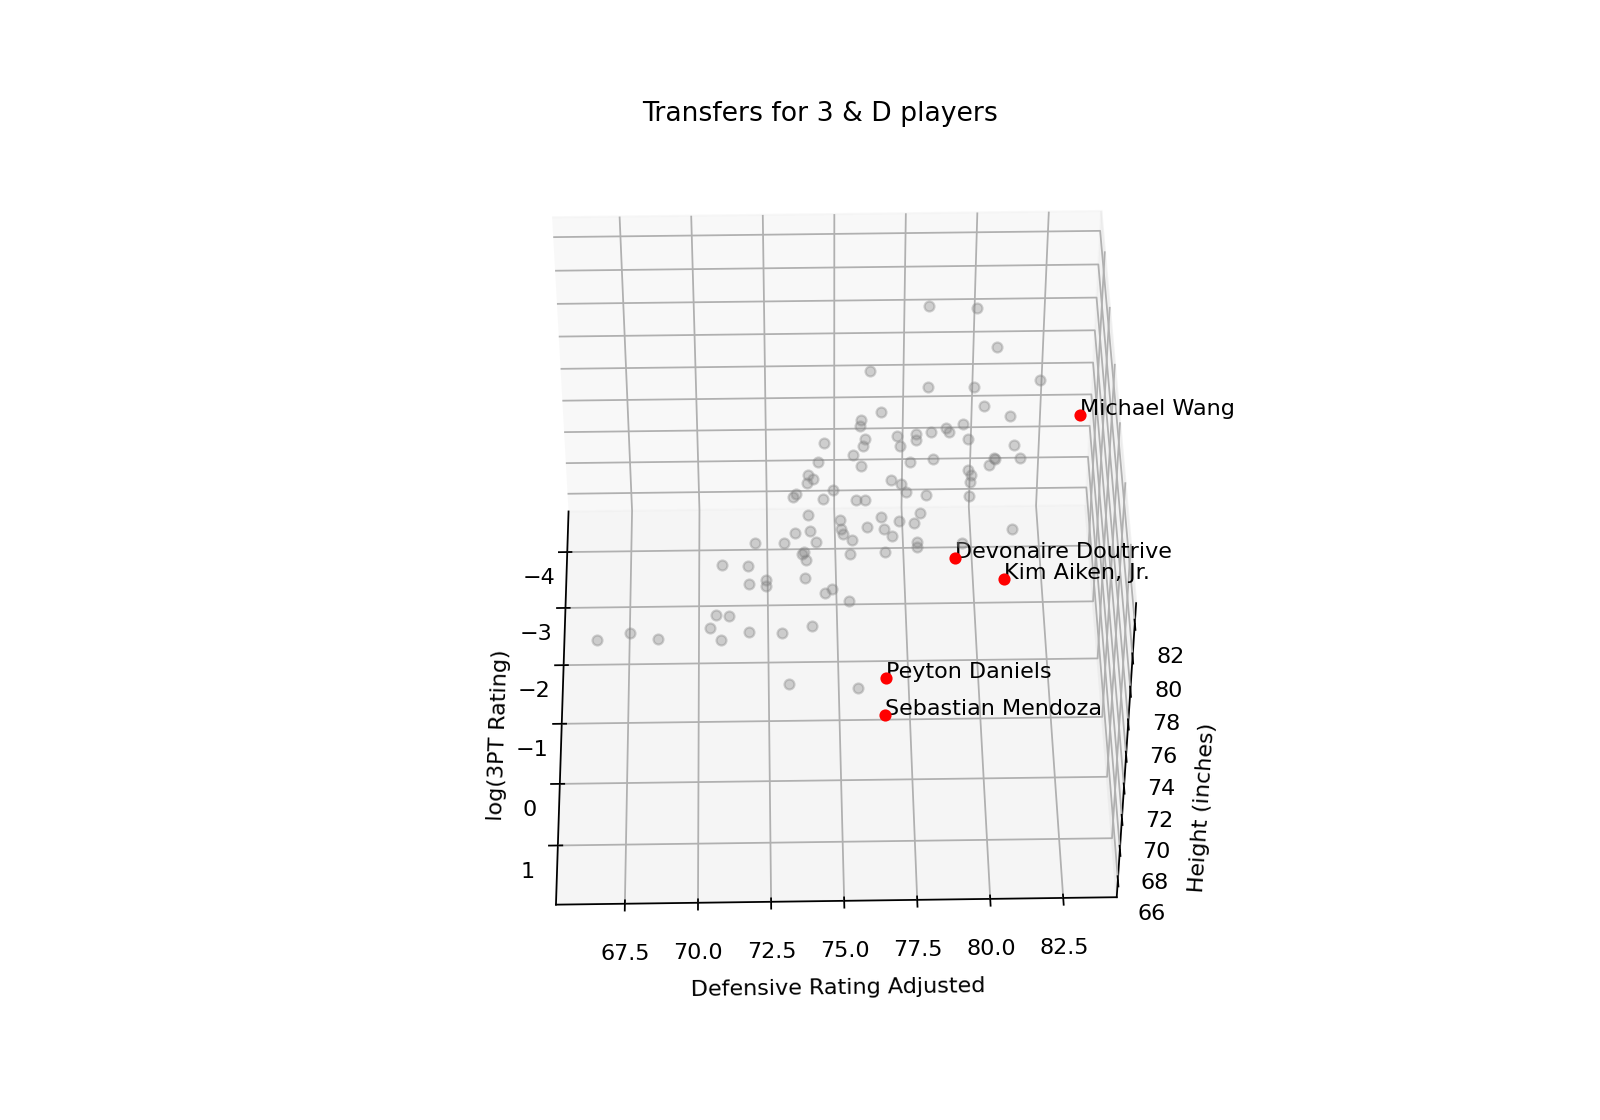

In [146]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

for i in range(len(data)):
    x, y, z = data.iloc[i]['3PT Rating Log'], data.iloc[i]['D Adj'] + data.iloc[i]['Ht'] , data.iloc[i]['Ht']
    
    if data.iloc[i]['Name'] in top["Name"].to_string():
        ax.scatter(x, y, z, color='red')
        ax.text(x, y, z, '{0}'.format(data.iloc[i]['Name']), size=10)
    else:
        ax.scatter(x, y, z, color='gray', alpha=.35)

ax.set_title("Transfers for 3 & D players")

ax.set_xlabel('log(3PT Rating)')
ax.set_ylabel('Defensive Rating Adjusted')
ax.set_zlabel('Height (inches)')
plt.show()
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(45, angle)
    plt.draw()
    plt.pause(.001)